# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Train the agent with ddpg

In [5]:
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent
import torch

%matplotlib inline

Initialising ReplayBuffer
Appended to Agent.instances agent 0
Appended to Agent.instances agent 1
Episode 100	Average Score: 0.00.72	Rewards [ 0.00 -0.01]	Scores: [ 0.00 -0.01]
Episode 200	Average Score: 0.00.49	Rewards [-0.01  0.00]	Scores: [-0.01  0.00]
Episode 300	Average Score: 0.00.29	Rewards [ 0.00 -0.01]	Scores: [ 0.00 -0.01]
Episode 400	Average Score: 0.01.09	Rewards [-0.01  0.00]	Scores: [-0.01  0.00]
Episode 500	Average Score: 0.01.92	Rewards [ 0.00 -0.01]	Scores: [ 0.00 -0.01]
Episode 600	Average Score: 0.04.72	Rewards [-0.01  0.00]	Scores: [-0.01  0.00]
Episode 700	Average Score: 0.06.53	Rewards [ 0.00 -0.01]	Scores: [ 0.20  0.09]
Episode 800	Average Score: 0.07.38	Rewards [-0.01  0.00]	Scores: [-0.01  0.00]]
Episode 900	Average Score: 0.25.14	Rewards [ 0.00 -0.01]	Scores: [ 0.10  0.09]]
Episode 925	Timestep 1000	Noise 0.04	Rewards [ 0.00  0.00]	Scores: [ 2.60  2.60]
Environment solved in 925 episodes!	Average Score: 0.52
Episode 1000	Average Score: 1.73 0.00	Rewards [ 0.00

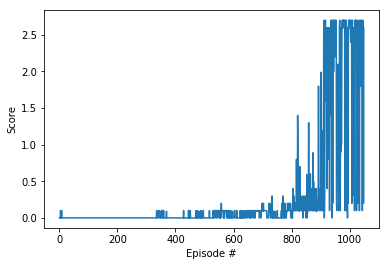

In [6]:
def ddpg(n_episodes=1500, max_t=1000, vars=None):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """

   
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    agents =[] 
    noise = 2
    noise_reduction = 0.9999
    finishow = True
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        t = 0    
        while True:
            actions = np.array([agents[i].act(states[i],noise) for i in range(num_agents)])
            noise *= noise_reduction

            env_info = env.step(actions)[brain_name]        
            next_states = env_info.vector_observations     
            rewards = env_info.rewards                     
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t,states, actions, rewards, next_states, dones,num_agents) 
 
            states = next_states
            scores += rewards
            
            print('\rEpisode {}\tTimestep {}\tNoise {:.2f}\tRewards {}\tScores: {}'
                .format(i_episode, t, noise, np.array(rewards), scores), end="") 
            if np.any(dones):
                break
            t += 1
            
        score = np.max(scores)
        scores_window.append(score)      
        scores_episode.append(score)

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            if finishow:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(len(scores_episode), np.mean(scores_window)))
                torch.save(Agent.instances[0].actor_local.state_dict(), 'checkpoint1_actor0.pth')
                torch.save(Agent.instances[1].actor_local.state_dict(), 'checkpoint1_actor1.pth')
                torch.save(Agent.critic_local.state_dict(), 'checkpoint1_critic.pth')
                finishow = False            
    return {
            "scores_window":    scores_window ,
            "scores": scores , 
            "scores_episode" : scores_episode ,
            "agents": agents ,
            "noise": noise , 
            "noise_reduction": noise_reduction,
            "finishow": finishow}

# Tennis environment needs 2 agents
assert num_agents == 2
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
    
data = ddpg(n_episodes=1050, max_t=1000, vars=None)    
scores = data["scores_episode"]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Max mooving average Score:  1.9908000296726822 at Episode #: 1042


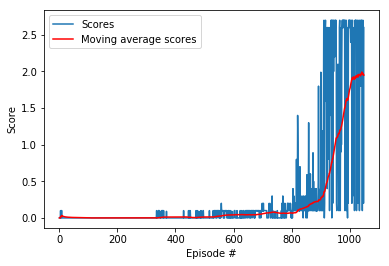

In [7]:
    fig = plt.figure()
    plt.plot(np.arange(len(scores)), scores, label='Scores')
    plt.ylabel('Score')
    plt.xlabel('Episode #')

    cumsum_vec = np.cumsum(scores) 
    window_width = 100
    ma_vec1 = np.cumsum(scores[:window_width])/(np.arange(window_width)+1)
    ma_vec2 = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    ma_vec = np.concatenate((ma_vec1, ma_vec2))
    plt.plot(np.arange(len(scores)), ma_vec, label='Moving average scores', color='r')
    plt.legend()
    
    print('Max mooving average Score: ', ma_vec.max(), 'at Episode #:', ma_vec.argmax())
    plt.show()

In [8]:
env.close()